In [254]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [255]:
dataset= pd.read_csv("student_data.csv")

In [256]:
dataset.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Sal,Discount
0,165527,Bryan Rogers,19-01-2006,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,23-05-1999,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,02-12-1997,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,30-10-1999,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,10-01-1998,Chemical Engineering,2016,2018,1,Network Security,125934,14871


In [257]:
dataset.drop(['Student ID','Student Name','Student Name','Date of Birth','Year of Admission','Expected Year of Graduation','Discount'],axis=1,inplace= True)

In [258]:
dataset.head()

,Field of Study,Current Semester,Specialization,Sal
0,Computer Science,3,Web Development,155152
1,Mechanical Engineering,2,Machine Learning,157870
2,Civil Engineering,1,Network Security,55662
3,Computer Science,1,Data Science,134955
4,Chemical Engineering,1,Network Security,125934


In [259]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [260]:
print(x)

[['Computer Science' 3 'Web Development']
 ['Mechanical Engineering' 2 'Machine Learning']
 ['Civil Engineering' 1 'Network Security']
 ...
 ['Chemical Engineering' 1 'Data Science']
 ['Civil Engineering' 1 'Data Science']
 ['Computer Science' 2 'Machine Learning']]


In [261]:
print(y)

[155152 157870  55662 ... 139430  73117  75582]


In [264]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
c=make_column_transformer( (OneHotEncoder(categories='auto'),[0, 2]), remainder="passthrough" )
x=c.fit_transform(x)


In [265]:
print(x.ndim)
print(x.shape,y.shape)
type(x)
print(x)

2
(200000, 11) (200000,)
  (0, 2)	1.0
  (0, 9)	1.0
  (0, 10)	3.0
  (1, 4)	1.0
  (1, 7)	1.0
  (1, 10)	2.0
  (2, 1)	1.0
  (2, 8)	1.0
  (2, 10)	1.0
  (3, 2)	1.0
  (3, 6)	1.0
  (3, 10)	1.0
  (4, 0)	1.0
  (4, 8)	1.0
  (4, 10)	1.0
  (5, 4)	1.0
  (5, 9)	1.0
  (5, 10)	4.0
  (6, 4)	1.0
  (6, 5)	1.0
  (6, 10)	1.0
  (7, 3)	1.0
  (7, 5)	1.0
  (7, 10)	2.0
  (8, 0)	1.0
  :	:
  (199991, 10)	3.0
  (199992, 4)	1.0
  (199992, 5)	1.0
  (199992, 10)	3.0
  (199993, 2)	1.0
  (199993, 7)	1.0
  (199993, 10)	1.0
  (199994, 0)	1.0
  (199994, 9)	1.0
  (199994, 10)	3.0
  (199995, 3)	1.0
  (199995, 6)	1.0
  (199995, 10)	4.0
  (199996, 3)	1.0
  (199996, 9)	1.0
  (199996, 10)	3.0
  (199997, 0)	1.0
  (199997, 6)	1.0
  (199997, 10)	1.0
  (199998, 1)	1.0
  (199998, 6)	1.0
  (199998, 10)	1.0
  (199999, 2)	1.0
  (199999, 7)	1.0
  (199999, 10)	2.0


In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [267]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [268]:
y=[]
for i in range(len(y_test)):
    y.append( (y_test[i]-y_pred[i])/y_test[i])
print(y[:100])


[-0.04485653394488032, 0.18560171315042875, -1.1952675986695582, 0.32155410409218443, -1.2488187655133904, 0.11884639572219963, -0.502418091291377, -0.7309748533353154, -0.8227354200341451, 0.1901338913130672, 0.2580339934949149, 0.26203054435129974, 0.11655905598629172, 0.25906965006548116, -0.17929191704009478, -0.5601464436482242, -0.010232054382438934, 0.172380267876388, -0.7633195306652096, -0.8910882602596123, 0.34930125655026373, 0.28476217396342135, -0.3872656627264285, 0.345973159508916, 0.3682023432601982, 0.24699952957468782, -0.2550189600692119, 0.25931720563902244, -0.10207021849589454, 0.2269421615445153, 0.33553052271685246, -0.3556841308247509, 0.23652657698331392, -0.23363042109364693, -0.5776675149980707, 0.276325751350731, 0.13444572788354486, 0.3418855039597083, -0.1524701233927821, -0.4147397280754015, -0.248324530161248, -0.2879669400813898, 0.045990681692843184, 0.37691898770269583, 0.006570960434456037, -0.3004829302439672, 0.3681479267498523, 0.2155597617438267

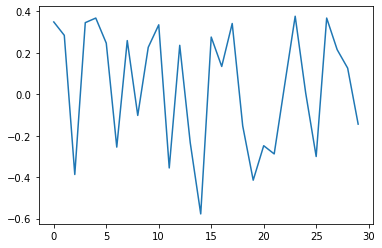

In [271]:

plt.plot(y[20:50])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
polynomial_reg = PolynomialFeatures(degree = 4)
X_poly = polynomial_reg.fit_transform(x)

linear_reg_2 = LinearRegression()
linear_reg_2.fit(X_poly, y)

In [ ]:
y_pred = linear_reg_2.predict(polynomial_reg.fit_transform(x))
y_pred

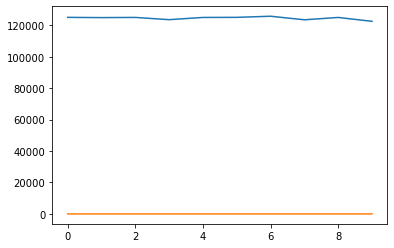

In [270]:
plt.plot(y_pred[:10])
plt.plot(y[:10])

In [ ]:
err=np.array(y_pred-y)
print(err)